<a href="https://colab.research.google.com/github/nguyenduychinh/AI_24_02_23/blob/main/ai_10_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

127.35320304017381


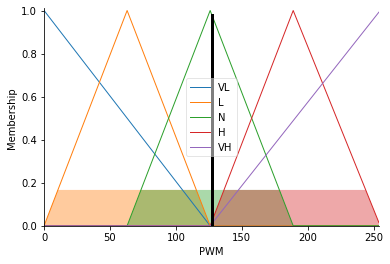

In [ ]:
from skfuzzy.control.controlsystem import ControlSystemSimulation
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
temp= ctrl.Antecedent(np.arange(18,30,1),'Temp')
sensor = ctrl.Antecedent(np.arange(-5,60,1),'Sensor')
pwm = ctrl.Consequent(np.arange(0,255,1),'PWM')

temp['thap']=fuzz.trimf(temp.universe,[18,18,24])
temp['binhthuong']=fuzz.trimf(temp.universe,[18,24,30])
temp['cao']=fuzz.trimf(temp.universe,[24,24,30])
sensor['ratthap']=fuzz.trimf(sensor.universe,[-5,-5,28])
sensor['thap']=fuzz.trimf(sensor.universe,[-5,12,28])
sensor['binhthuong']=fuzz.trimf(sensor.universe,[12,28,45])
sensor['cao']=fuzz.trimf(sensor.universe,[28,45,60])
sensor['ratcao']=fuzz.trimf(sensor.universe,[28,60,60])
pwm['VL']=fuzz.trimf(pwm.universe,[0,0,126])
pwm['L']=fuzz.trimf(pwm.universe,[0,63,126])
pwm['N']=fuzz.trimf(pwm.universe,[63,126,189])
pwm['H']=fuzz.trimf(pwm.universe,[126,189,255])
pwm['VH']=fuzz.trimf(pwm.universe,[126,255,255])

luat1 = ctrl.Rule(temp['thap'] & sensor['ratthap'],pwm['VL'])
luat2 = ctrl.Rule(temp['thap'] & sensor['thap'],pwm['VL'])
luat3 = ctrl.Rule(temp['thap'] & sensor['binhthuong'],pwm['L'])
luat4 = ctrl.Rule(temp['thap'] & sensor['cao'],pwm['N'])
luat5 = ctrl.Rule(temp['thap'] & sensor['ratcao'],pwm['N'])
luat6 = ctrl.Rule(temp['binhthuong'] & sensor['ratthap'],pwm['L'])
luat7 = ctrl.Rule(temp['binhthuong'] & sensor['thap'],pwm['L'])
luat8 = ctrl.Rule(temp['binhthuong'] & sensor['binhthuong'],pwm['N'])
luat9 = ctrl.Rule(temp['binhthuong'] & sensor['cao'],pwm['H'])
luat10 = ctrl.Rule(temp['binhthuong'] & sensor['ratcao'],pwm['H'])
luat11 = ctrl.Rule(temp['cao'] & sensor['ratthap'],pwm['L'])
luat12 = ctrl.Rule(temp['cao'] & sensor['thap'],pwm['N'])
luat13 = ctrl.Rule(temp['cao'] & sensor['binhthuong'],pwm['H'])
luat14 = ctrl.Rule(temp['cao'] & sensor['cao'],pwm['VH'])
luat15 = ctrl.Rule(temp['cao'] & sensor['ratcao'],pwm['VH'])

tipping_ctrl = ctrl.ControlSystem([luat1,luat2,luat3,luat4,luat5,luat6,luat7,luat8,luat9,luat10,luat11,luat12,luat13,luat14,luat15])
tipping = ControlSystemSimulation(tipping_ctrl)
tipping.input['Temp']=29
tipping.input['Sensor']=25
tipping.compute()
print(tipping.output['PWM'])
pwm.view(sim = tipping)



In [ ]:
from skfuzzy.control.controlsystem import ControlSystemSimulation
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
sensor_l = ctrl.Antecedent(np.arange(0,1.5,0.1),'Sensor_L')
sensor_c = ctrl.Antecedent(np.arange(0,1.5,0.1),'Sensor_C')
sensor_r = ctrl.Antecedent(np.arange(0,1.5,0.1),'Sensor_R')
LC = ctrl.Consequent(np.arange(0,90,1),'LC')
RC = ctrl.Consequent(np.arange(-90,0,1),'RC')
pwm1 = ctrl.Consequent(np.arange(0,255,1),'PWM1')
pwm2 = ctrl.Consequent(np.arange(0,255,1),'PWM2')

sensor_l['ratthap']=fuzz.trimf(sensor_l.universe,[0,0,0.8])
sensor_l['thap']=fuzz.trimf(sensor_l.universe,[0,0.4,0.8])
sensor_l['binhthuong']=fuzz.trimf(sensor_l.universe,[0.4,0.8,1.2])
sensor_l['cao']=fuzz.trimf(sensor_l.universe,[0.8,1.2,1.5])
sensor_l['ratcao']=fuzz.trimf(sensor_l.universe,[0.8,1.5,1.5])
sensor_r['ratthap']=fuzz.trimf(sensor_r.universe,[0,0,0.8])
sensor_r['thap']=fuzz.trimf(sensor_r.universe,[0,0.4,0.8])
sensor_r['binhthuong']=fuzz.trimf(sensor_r.universe,[0.4,0.8,1.2])
sensor_r['cao']=fuzz.trimf(sensor_r.universe,[0.8,1.2,1.5])
sensor_r['ratcao']=fuzz.trimf(sensor_r.universe,[0.8,1.5,1.5])
sensor_c['thap']=fuzz.trimf(sensor_c.universe,[0,0,0.8])
sensor_c['binhthuong']=fuzz.trimf(sensor_c.universe,[0,0.8,1.5])
sensor_c['cao']=fuzz.trimf(sensor_c.universe,[0.8,1.5,1.5])

LC['VL']=fuzz.trimf(LC.universe,[0,0,45])
LC['L']=fuzz.trimf(LC.universe,[0,23,45])
LC['N']=fuzz.trimf(LC.universe,[23,45,68])
LC['H']=fuzz.trimf(LC.universe,[45,68,90])
LC['VH']=fuzz.trimf(LC.universe,[45,90,90])
RC['VL']=fuzz.trimf(LC.universe,[0,0,45])
RC['L']=fuzz.trimf(LC.universe,[0,23,45])
RC['N']=fuzz.trimf(LC.universe,[23,45,68])
RC['H']=fuzz.trimf(LC.universe,[45,68,90])
RC['VH']=fuzz.trimf(LC.universe,[45,90,90])

pwm1['VL']=fuzz.trimf(pwm1.universe,[0,0,126])
pwm1['L']=fuzz.trimf(pwm1.universe,[0,63,126])
pwm1['N']=fuzz.trimf(pwm1.universe,[63,126,189])
pwm1['H']=fuzz.trimf(pwm1.universe,[126,189,255])
pwm1['VH']=fuzz.trimf(pwm1.universe,[126,255,255])
pwm2['VL']=fuzz.trimf(pwm2.universe,[0,0,126])
pwm2['L']=fuzz.trimf(pwm2.universe,[0,63,126])
pwm2['N']=fuzz.trimf(pwm2.universe,[63,126,189])
pwm2['H']=fuzz.trimf(pwm2.universe,[126,189,255])
pwm2['VH']=fuzz.trimf(pwm2.universe,[126,255,255])

luat1 = ctrl.Rule(sensor_c['thap'] & sensor_l['ratthap'],LC['VL'])
luat2 = ctrl.Rule(sensor_c['thap'] & sensor_l['thap'],LC['VL'])
luat3 = ctrl.Rule(sensor_c['thap'] & sensor_l['binhthuong'],LC['L'])
luat4 = ctrl.Rule(sensor_c['thap'] & sensor_l['cao'],LC['N'])
luat5 = ctrl.Rule(sensor_c['thap'] & sensor_l['ratcao'],LC['N'])
luat6 = ctrl.Rule(sensor_c['binhthuong'] & sensor_l['ratthap'],LC['L'])
luat7 = ctrl.Rule(sensor_c['binhthuong'] & sensor_l['thap'],LC['L'])
luat8 = ctrl.Rule(sensor_c['binhthuong'] & sensor_l['binhthuong'],LC['N'])
luat9 = ctrl.Rule(sensor_c['binhthuong'] & sensor_l['cao'],LC['H'])
luat10 = ctrl.Rule(sensor_c['binhthuong'] & sensor_l['ratcao'],LC['H'])
luat11 = ctrl.Rule(sensor_c['cao'] & sensor_l['ratthap'],LC['L'])
luat12 = ctrl.Rule(sensor_c['cao'] & sensor_l['thap'],LC['N'])
luat13 = ctrl.Rule(sensor_c['cao'] & sensor_l['binhthuong'],LC['H'])
luat14 = ctrl.Rule(sensor_c['cao'] & sensor_l['cao'],LC['VH'])
luat15 = ctrl.Rule(sensor_c['cao'] & sensor_l['ratcao'],LC['VH'])

luat16 = ctrl.Rule(sensor_c['thap'] & sensor_r['ratthap'],RC['VL'])
luat17 = ctrl.Rule(sensor_c['thap'] & sensor_r['thap'],RC['VL'])
luat18 = ctrl.Rule(sensor_c['thap'] & sensor_r['binhthuong'],RC['L'])
luat19 = ctrl.Rule(sensor_c['thap'] & sensor_r['cao'],RC['N'])
luat20 = ctrl.Rule(sensor_c['thap'] & sensor_r['ratcao'],RC['N'])
luat21 = ctrl.Rule(sensor_c['binhthuong'] & sensor_r['ratthap'],RC['L'])
luat22 = ctrl.Rule(sensor_c['binhthuong'] & sensor_r['thap'],RC['L'])
luat23 = ctrl.Rule(sensor_c['binhthuong'] & sensor_r['binhthuong'],RC['N'])
luat24 = ctrl.Rule(sensor_c['binhthuong'] & sensor_r['cao'],RC['H'])
luat25 = ctrl.Rule(sensor_c['binhthuong'] & sensor_r['ratcao'],RC['H'])
luat26 = ctrl.Rule(sensor_c['cao'] & sensor_r['ratthap'],RC['L'])
luat27 = ctrl.Rule(sensor_c['cao'] & sensor_r['thap'],RC['N'])
luat28 = ctrl.Rule(sensor_c['cao'] & sensor_r['binhthuong'],RC['H'])
luat29 = ctrl.Rule(sensor_c['cao'] & sensor_r['cao'],RC['VH'])
luat30 = ctrl.Rule(sensor_c['cao'] & sensor_r['ratcao'],RC['VH'])










In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=9ddf486ccab7702b6acc3e9921285b6806230a1356389168ddd5b88ac6b58ac7
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
